In [204]:
import pandas as pd
import numpy as np


In [205]:
df = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Carrera_911_1_2.csv',index_col=[0])

In [206]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950.0,2012,Porsche,911,Carrera,Black,Edition,Black,Automatic
1,Used,19020,67988.0,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990.0,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900.0,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995.0,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950.0,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995.0,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900.0,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995.0,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [207]:
df['Cabriolet'].value_counts()

Hardtop      736
Cabriolet     69
Edition        4
Black          1
Name: Cabriolet, dtype: int64

In [208]:
df.isnull().sum()

condition       0
milage          0
Price           0
Year            0
Brand           0
Model           0
Model_Vers      0
S_RS            0
Cabriolet       0
Color           0
Transmission    0
dtype: int64

In [209]:
df['Cabriolet'] = df['Cabriolet'].replace("Black",'Hardtop')

In [210]:
df['Cabriolet'] = df['Cabriolet'].replace("Edition",'Hardtop')

In [211]:
df['Price'] = df['Price'].astype(int)

In [212]:
df.dtypes

condition       object
milage           int64
Price            int32
Year             int64
Brand           object
Model            int64
Model_Vers      object
S_RS            object
Cabriolet       object
Color           object
Transmission    object
dtype: object

In [213]:
df.condition.value_counts(normalize=True)

Used                 0.84321
Porsche Certified    0.15679
Name: condition, dtype: float64

In [214]:
df['condition'] = df['condition'].replace("Porsche Certified",'CPO')

In [215]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.20, random_state=2)

In [216]:
train

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1176,Used,35750,39300,2008,Porsche,911,Carrera,S,Cabriolet,Black,Manual
692,Used,26324,59000,2010,Porsche,911,Carrera,4S,Cabriolet,Other,Automatic
758,Used,130000,34900,2013,Porsche,911,Carrera,Base,Hardtop,Gray/Silver,Automatic
825,Used,4113,103995,2017,Porsche,911,Carrera,Base,Hardtop,White,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1047,CPO,34541,84995,2018,Porsche,911,Carrera,Base,Hardtop,White,Automatic
1151,CPO,17066,89957,2015,Porsche,911,Carrera,GTS,Hardtop,Red,Automatic
938,Used,40700,66999,2017,Porsche,911,Carrera,Base,Hardtop,White,Automatic
1035,Used,26067,94951,2017,Porsche,911,Carrera,S,Hardtop,White,Automatic


In [217]:
test

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
830,Used,36843,78777,2015,Porsche,911,Carrera,S,Hardtop,White,Automatic
244,Used,22789,103900,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
226,CPO,13220,106900,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1020,Used,21136,73995,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
606,Used,35103,68398,2018,Porsche,911,Carrera,Base,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1098,Used,5517,99495,2019,Porsche,911,Carrera,T,Hardtop,Red,Automatic
1408,Used,17000,35000,2008,Porsche,911,Carrera,S,Cabriolet,Other,Manual
936,Used,26775,67500,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
1261,Used,22463,56997,2013,Porsche,911,Carrera,Base,Hardtop,Gray/Silver,Manual


In [218]:
feature = ['condition','milage','Year','S_RS','Cabriolet','Color','Transmission']
target = 'Price'
X_train = train[feature]
X_test = test[feature]
Y_test = test[target]
Y_train = train[target]

In [219]:
!pip install category_encoders

In [220]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)

In [221]:
X_test

,condition,milage,Year,S_RS,Cabriolet,Color,Transmission
830,Used,36843,2015,S,Hardtop,White,Automatic
244,Used,22789,2017,4S,Hardtop,Black,Automatic
226,CPO,13220,2017,4S,Hardtop,Black,Automatic
1020,Used,21136,2013,S,Hardtop,White,Automatic
606,Used,35103,2018,Base,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...
1098,Used,5517,2019,T,Hardtop,Red,Automatic
1408,Used,17000,2008,S,Cabriolet,Other,Manual
936,Used,26775,2013,S,Hardtop,White,Automatic
1261,Used,22463,2013,Base,Hardtop,Gray/Silver,Manual


In [222]:
X_train

,condition,milage,Year,S_RS,Cabriolet,Color,Transmission
1494,Used,15710,2016,4S,Hardtop,White,Manual
1176,Used,35750,2008,S,Cabriolet,Black,Manual
692,Used,26324,2010,4S,Cabriolet,Other,Automatic
758,Used,130000,2013,Base,Hardtop,Gray/Silver,Automatic
825,Used,4113,2017,Base,Hardtop,White,Automatic
...,...,...,...,...,...,...,...
1047,CPO,34541,2018,Base,Hardtop,White,Automatic
1151,CPO,17066,2015,GTS,Hardtop,Red,Automatic
938,Used,40700,2017,Base,Hardtop,White,Automatic
1035,Used,26067,2017,S,Hardtop,White,Automatic


In [223]:
X_train = encoder.fit_transform(X_train)

In [224]:
X_test = encoder.fit_transform(X_test)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()


model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
y_pred_train = model.predict(X_train)
print("MAE(Train):$",mean_absolute_error(Y_train, y_pred_train))

MAE(Train):$ 5887.1435565924985


In [227]:
r2_base = r2_score(Y_train, y_pred_train)
print('R^2 scores (Train):',r2_base)

R^2 scores (Train): 0.8526697531427914


In [228]:
y_pred_val = model.predict(X_test)
print("MAE(Val):$",mean_absolute_error(Y_test, y_pred_val))

MAE(Val):$ 9245.341766848309


In [229]:
r2_base = r2_score(Y_test, y_pred_val)
print('R^2 scores (Val):',r2_base)

R^2 scores (Val): 0.6024955718824534


In [230]:
model.coef_

array([-1.31655432e+03,  1.31655432e+03, -3.33234590e-01,  3.96288098e+03,
        2.70944244e+03, -2.65031358e+03, -1.14525798e+04,  1.85901607e+04,
       -7.61778495e+03, -1.13169386e+04,  2.47773451e+04, -1.30393313e+04,
       -1.01278027e+03,  1.01278027e+03, -5.60972173e+02, -2.61793715e+03,
        5.96289735e+02,  3.28889368e+02,  1.37856716e+03,  8.75163062e+02,
        1.05500997e+03, -1.05500997e+03])

In [231]:
list(X_train)

['condition_Used',
 'condition_CPO',
 'milage',
 'Year',
 'S_RS_4S',
 'S_RS_S',
 'S_RS_Base',
 'S_RS_GTS',
 'S_RS_4',
 'S_RS_T',
 'S_RS_GTS4',
 'S_RS_Black',
 'Cabriolet_Hardtop',
 'Cabriolet_Cabriolet',
 'Color_White',
 'Color_Black',
 'Color_Other',
 'Color_Gray/Silver',
 'Color_Blue',
 'Color_Red',
 'Transmission_Manual',
 'Transmission_Automatic']

In [232]:
condition_Used = 0
condition_CPO = 1
milage = 30000
Year = 2016
S_RS_4S = 0
S_RS_S = 0
S_RS_Base = 1
S_RS_GTS = 0
S_RS_4 = 0
S_RS_T = 0
S_RS_4GTS = 0
S_RS_Black_Ed = 0
Cabriolet_Hardtop = 0
Cabriolet_Cabriolet= 1
Color_White = 0
Color_Black = 1
Color_Other = 0
Color_Gray_Silver = 0
Color_Blue = 0
Color_Red = 0
Transmission_Manual = 0
Transmission_Automatic = 1

In [233]:
price = model.predict([[condition_Used,condition_CPO,milage,Year,S_RS_4S,S_RS_S
                ,S_RS_Base,S_RS_GTS,S_RS_4,S_RS_T,S_RS_4GTS,
                S_RS_Black_Ed,Cabriolet_Hardtop,Cabriolet_Cabriolet,Color_White,
                Color_Black,Color_Other,Color_Gray_Silver,Color_Blue,Color_Red,Transmission_Automatic,
                Transmission_Manual]])


In [234]:
print("Your 911 should be price at :$",price)

Your 911 should be price at :$ [75973.26777012]


In [235]:
dt = df.copy()

### Linear Model (Ridge)
---

In [236]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1,8,9,10,15], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0828s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1267s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1656s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapse

In [237]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'median', 'selectkbest__k': 15, 'ridge__alpha': 15}
Cross-validation MAE 6029.473357954733


In [238]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,90,19,39,0,52,71,5,79,86,23,...,10,12,49,54,75,89,84,82,64,6
mean_fit_time,0.00658255,0.00767965,0.00787895,0.0428851,0.00817814,0.00987418,0.00578454,0.00797882,0.00688145,0.00678282,...,0.00777972,0.0069824,0.00765629,0.00658243,0.00977371,0.00618348,0.00668204,0.00957429,0.00628595,0.00638311
std_fit_time,0.000488656,0.00100202,0.00229413,0.00362405,0.00321026,0.00485471,0.000869196,0.00109254,0.000536588,0.000868552,...,0.00116307,0.000772079,0.000892279,0.000488219,0.0040582,0.000746775,0.000778927,0.00354535,0.00118404,0.000661503
mean_score_time,0.00169523,0.00169549,0.00269279,0.00189533,0.00179546,0.00169528,0.0012964,0.00199454,0.00189524,0.00159512,...,0.00159538,0.00149508,0.00189507,0.00169535,0.00179579,0.00159602,0.00169539,0.00249333,0.00119672,0.00149546
std_score_time,0.000897617,0.000638695,0.00248538,0.000299108,0.000598368,0.000638334,0.000456566,0.000630902,0.000298755,0.000490014,...,0.000489252,0.000498248,0.000299734,0.000456924,0.000598479,0.00048851,0.000457527,0.00205635,0.000399125,0.000668889
param_simpleimputer__strategy,mean,median,mean,mean,mean,median,mean,median,mean,mean,...,median,median,median,mean,median,mean,mean,median,mean,median
param_selectkbest__k,15,15,15,17,15,16,16,17,17,16,...,2,3,2,3,4,4,3,1,1,1
param_ridge__alpha,15,15,9,15,1,15,15,10,8,10,...,1,9,0.1,8,1,1,0.1,8,1,0.1
params,"{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...",...,"{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk..."
split0_test_score,-4733.15,-4733.15,-4766.66,-4989.98,-4854.57,-4984.76,-4984.76,-5030.6,-5047.52,-5027.16,...,-6604.59,-6722.66,-6603.08,-6723.92,-6733.23,-6733.23,-6734.29,-9479.75,-9468.1,-9466.85
split1_test_score,-5192.24,-5192.24,-5233.41,-5364.65,-5308.55,-5360.37,-5360.37,-5397.43,-5410.26,-5394.49,...,-6716.74,-6664.34,-6720.17,-6666.41,-6691.84,-6691.84,-6696.05,-8880.38,-8930.84,-8937.65


In [239]:
pipeline = search.best_estimator_
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $9,003


### Random Forrest Regressor
---

In [240]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed

In [241]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.5464991179262112, 'randomforestregressor__n_estimators': 83, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 20}
Cross-validation MAE 5287.43969734708


In [242]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__n_estimators,param_simpleimputer__strategy,param_targetencoder__min_samples_leaf,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
58,0.433908,0.116994,0.034064,0.011191,None,0.546499,83,median,20,"{'randomforestregressor__max_depth': None, 'ra...",...,-2103.545021,-1996.927298,-1956.543946,-1974.851619,-1913.876790,-1917.167848,-1815.734403,-1950.174224,-1965.049959,72.468094
40,0.623783,0.059273,0.038697,0.009543,None,0.684833,169,mean,116,"{'randomforestregressor__max_depth': None, 'ra...",...,-2146.658327,-2143.430410,-2090.955971,-2034.380759,-2057.102936,-2077.787815,-1857.328098,-2087.276283,-2078.734676,83.955646
32,1.380376,0.228166,0.064785,0.017504,20,0.7087,368,mean,174,"{'randomforestregressor__max_depth': 20, 'rand...",...,-2185.194404,-2141.075595,-2144.503067,-2054.551360,-2058.881498,-2103.437421,-1943.059894,-2125.467610,-2113.102644,74.399763
33,0.736767,0.073362,0.047174,0.012858,10,0.593285,234,mean,130,"{'randomforestregressor__max_depth': 10, 'rand...",...,-2760.516129,-2789.977591,-2795.051457,-2654.905094,-2569.225158,-2672.046358,-2515.931970,-2726.790282,-2702.256479,97.554067
90,0.853902,0.112691,0.043441,0.005609,15,0.771539,240,median,98,"{'randomforestregressor__max_depth': 15, 'rand...",...,-2184.286533,-2163.816287,-2166.154826,-2074.146989,-2084.960249,-2107.067654,-1951.544705,-2156.288332,-2126.292687,70.913124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.750469,0.080055,0.046329,0.009527,20,0.185592,209,mean,334,"{'randomforestregressor__max_depth': 20, 'rand...",...,-3158.993900,-3030.366985,-3131.136489,-3011.846558,-2974.877819,-2998.654791,-2843.439079,-3091.873246,-3050.450719,97.466842
47,0.313681,0.046984,0.027286,0.005960,None,0.0395182,61,mean,271,"{'randomforestregressor__max_depth': None, 'ra...",...,-3164.443832,-3043.131344,-3150.147372,-3012.506791,-2993.169896,-3020.678121,-2864.981305,-3140.117645,-3075.567264,103.450510
65,0.335631,0.054718,0.025981,0.004078,15,0.273349,64,median,423,"{'randomforestregressor__max_depth': 15, 'rand...",...,-3239.641404,-3116.991326,-3155.876944,-3033.730710,-3027.269614,-3120.068322,-2912.279734,-3167.054000,-3114.345993,97.422227
53,0.733350,0.102687,0.042885,0.013216,15,0.104191,224,mean,451,"{'randomforestregressor__max_depth': 15, 'rand...",...,-3227.252979,-3073.976343,-3176.510215,-3075.538778,-3027.258508,-3039.185436,-2883.504885,-3127.309455,-3096.722218,99.672943


In [243]:
pipeline = search.best_estimator_

In [244]:
X_test = test[features]
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $5,841


In [245]:
X_test

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
830,Used,36843,2015,Porsche,911,Carrera,S,Hardtop,White,Automatic
244,Used,22789,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
226,CPO,13220,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1020,Used,21136,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
606,Used,35103,2018,Porsche,911,Carrera,Base,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...,...,...,...
1098,Used,5517,2019,Porsche,911,Carrera,T,Hardtop,Red,Automatic
1408,Used,17000,2008,Porsche,911,Carrera,S,Cabriolet,Other,Manual
936,Used,26775,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
1261,Used,22463,2013,Porsche,911,Carrera,Base,Hardtop,Gray/Silver,Manual


In [246]:
Model_test = X_test.loc[1,].copy()
Model_test

condition            Used
milage              19020
Year                 2015
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                 Base
Cabriolet         Hardtop
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [247]:
Model_test.condition = 'Used'
Model_test.milage = 60000
Model_test.Year = 2012
Model_test.Brand = 'Porsche'
Model_test.Model = 911
Model_test.Model_Vers = 'Carrera'
Model_test.S_RS = 'S'
Model_test.Cabriolet = 'Cabriolet'
Model_test.Color = 'Black'
Model_test.Transmission = 'Automatic'

In [248]:
Model_test

condition            Used
milage              60000
Year                 2012
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                    S
Cabriolet       Cabriolet
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [249]:
Model_test.to_csv('Test_Car.csv')

In [250]:
price = pipeline.predict([Model_test])


In [251]:
print("High price for your 911 is:$",round(price[0]+(price[0]*.05),0))
print("Fair price for your 911 is:$",round(price[0],0))
print("Low price for your 911 is:$",round(price[0]-(price[0]*.05),0))

High price for your 911 is:$ 51021.0
Fair price for your 911 is:$ 48591.0
Low price for your 911 is:$ 46161.0


In [252]:
train.Color.value_counts()

Black          218
White          117
Gray/Silver    101
Other           93
Blue            64
Red             55
Name: Color, dtype: int64

In [253]:
import joblib
joblib.dump(pipeline, '911_Price.pkl') 

['911_Price.pkl']

In [254]:
df.S_RS.value_counts()

S        286
Base     263
4S       148
GTS       47
4         29
GTS4      18
T         15
Black      4
Name: S_RS, dtype: int64

In [255]:
test_model_data = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Test_Car.csv',index_col=[0])

In [256]:
model = joblib.load('911_Price.sav')

In [257]:
model.predict([Model_test])

array([52387.30207463])

In [258]:
test_model_data = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Test_Car.csv',index_col=[0])

In [259]:
test_model_data.T

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
1,Used,60000,2013,Porsche,911,Carrera,S,Cabriolet,Black,Automatic


In [260]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950,2012,Porsche,911,Carrera,Black,Hardtop,Black,Automatic
1,Used,19020,67988,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [261]:
std = df.Price[df.Year==2012].std()

In [262]:
spot = (mean-price[0])/std

NameError: name 'mean' is not defined

In [263]:
spot

NameError: name 'spot' is not defined

In [264]:
year_for_chart = 2015

In [265]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

np.random.seed(1)
mean = df.Price[df.Year==year_for_chart].mean()
std = df.Price[df.Year==year_for_chart].std()
x = np.random.randn(10000)
spot = (mean)/std
hist_data = [x]
price = model.predict([Model_test])
fair = round(price[0],0)
group_labels = ['911 Carrera'] # name of the dataset
number = year_for_chart
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title={
        'text': f"{number} Carrera Price Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f")
    )
fig.add_trace(go.Scatter(
    x=[0,2.13,-2.11],
    y=[0.45,0.3,0.3],
    text=[f"Mean:{mean:,.0f}",f'1 STD:{(mean+std):,.0f}',f'-1 STD:{mean-std:,.0f}'],
    mode="text",
)) 

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0,
            y0=0,
            x1=0,
            y1=0.4,
            line=dict(
                color="Yellow",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=1,
            y0=0,
            x1=1,
            y1=0.23,
            line=dict(
                color="Red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=-1,
            y0=0,
            x1=-1,
            y1=0.23,
            line=dict(
                color="red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=spot,
            y0=0,
            x1=spot,
            y1=0.4,
            line=dict(
                color="Green",
                width=3
            )))
fig.show()

In [266]:
Model_test = Model_test.T

In [267]:
from ipywidgets import IntSlider
from IPython.display import display
x = IntSlider(description='x')
y = IntSlider(description='y')

def update_y(args):
    y.value = args['new']
    print(args['new'])

x.observe(update_y, 'value')

display(x)
display(y)

IntSlider(value=0, description='x')

IntSlider(value=0, description='y')

In [268]:
price[0]-mean

-19853.243379914442

In [269]:
spot = (mean-price[0])/std
spot_std = (price[0]-mean)
spot_std

-19853.243379914442

In [270]:
print("High price for your 911 is:$",round(price[0]+(price[0]*.05),0))
print("Fair price for your 911 is:$",round(price[0],0))
print("Low price for your 911 is:$",round(price[0]-(price[0]*.05),0))

High price for your 911 is:$ 55007.0
Fair price for your 911 is:$ 52387.0
Low price for your 911 is:$ 49768.0


In [271]:
import plotly.graph_objects as go

fig1 = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = spot_std,
    mode = "gauge+number+delta",
    title = {'text': "Price"},
    delta = {'reference': 0},
    gauge = {'axis': {'range': [-10000, 10000]},
            'bar': {'color': "#402306"},
             'steps' : [
                 {'range': [-10000, -3333], 'color': "#C29049"},
                 {'range': [-3333, 3333], 'color': "#464C47"},
                 {'range': [3333, 10000], 'color': "#A43131"}],
             'threshold' : {'line': {'color': "Black", 'width': 4}, 'thickness': 0.75, 'value': 1}}))

fig1.show()

In [272]:
Model_test

condition            Used
milage              60000
Year                 2012
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                    S
Cabriolet       Cabriolet
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [273]:
import plotly.express as px

fig3 = px.scatter(df, x="Year", y="Price", color="Transmission", trendline="lowess")
fig3.update_layout(
    title="The 991.1 and 991.2",
    xaxis_title="Model Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"),
    xaxis=dict(
        range=[2011.5, 2019.5]),
    yaxis=dict(
        range=[30000, 150000]),
        )
fig3.add_trace(go.Scatter(
    x=[year_for_chart],
    y=[price[0]],
    mode="markers",
)) 
fig.add_annotation(
        x=year_for_chart,
        y=price[0],
        xref="x",
        yref="y",
        text="max=5",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )  
fig3.show()

In [274]:
df.Year[df.Year==2012]

0       2012
3       2012
11      2012
12      2012
32      2012
        ... 
1465    2012
1466    2012
1468    2012
1486    2012
1491    2012
Name: Year, Length: 70, dtype: int64

In [275]:
from sklearn.ensemble import GradientBoostingRegressor

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    GradientBoostingRegressor(random_state=42)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'gradientboostingregressor__max_depth': [5, 10, 15, 20, None], 
    'gradientboostingregressor__loss': ['ls','lad','huber','quantile'], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed

In [276]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'gradientboostingregressor__loss': 'lad', 'gradientboostingregressor__max_depth': 20, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 12}
Cross-validation MAE 5198.506124859976


In [277]:
pipeline = search.best_estimator_

In [278]:

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $6,147


In [279]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    XGBRegressor(random_state=42,n_jobs=-1)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbregressor__learning_rate': [.03, 0.05, .07, 0.1,0.13,0.2],
    'xgbregressor__max_depth': [5, 6, 7,8, 9, 10],}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed

In [280]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 12, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 8}
Cross-validation MAE 5024.587994854267


In [281]:
pipeline = search.best_estimator_

In [282]:


y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $6,105


In [283]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_test,
                            Y_test,
                            n_jobs=-1)

In [284]:
p_importance = pd.DataFrame({'feature' : X_test.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).tail(10)

,feature,weight,std
2,Year,0.646827,0.064686
1,milage,0.271740,0.022545
6,S_RS,0.229786,0.016389
7,Cabriolet,0.001548,0.001891
8,Color,0.000561,0.004816
0,condition,0.000055,0.002576
3,Brand,0.000000,0.000000
4,Model,0.000000,0.000000
5,Model_Vers,0.000000,0.000000
9,Transmission,-0.006837,0.003616


In [285]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950,2012,Porsche,911,Carrera,Black,Hardtop,Black,Automatic
1,Used,19020,67988,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [286]:

guess = round(df.Price[df.Year==i].mean())
for i in range (2012, 2020):
    guess = round(df.Price[df.Year==i].mean())
    errors = guess - df['Price']
    m = round(df.Price[df.Year==i].mean())
    #print(i,'average price is ${}.'.format(m))
    mean_absolute_error = round(errors.abs().mean(),0)
    print('Mean absolute error for year {} is ${}.'.format(i,mean_absolute_error))

Mean absolute error for year 2012 is $19947.0.
Mean absolute error for year 2013 is $20225.0.
Mean absolute error for year 2014 is $18744.0.
Mean absolute error for year 2015 is $18632.0.
Mean absolute error for year 2016 is $22666.0.
Mean absolute error for year 2017 is $23336.0.
Mean absolute error for year 2018 is $28290.0.
Mean absolute error for year 2019 is $40999.0.


In [287]:
df.Price[df.Year == 2012].mean()

61906.65714285714

In [288]:
from sklearn.metrics import mean_squared_error
mean_squared_error(i, y_test)

TypeError: Expected sequence or array-like, got <class 'int'>

In [289]:
X_test

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
830,Used,36843,2015,Porsche,911,Carrera,S,Hardtop,White,Automatic
244,Used,22789,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
226,CPO,13220,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1020,Used,21136,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
606,Used,35103,2018,Porsche,911,Carrera,Base,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...,...,...,...
1098,Used,5517,2019,Porsche,911,Carrera,T,Hardtop,Red,Automatic
1408,Used,17000,2008,Porsche,911,Carrera,S,Cabriolet,Other,Manual
936,Used,26775,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
1261,Used,22463,2013,Porsche,911,Carrera,Base,Hardtop,Gray/Silver,Manual


In [295]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(Y_test, y_pred))

Gradient Boosting R^2 0.8433845540836193


In [297]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'milage'

isolated = pdp_isolate(
    model=gb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2e9051b8308>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2e9048f7148>})

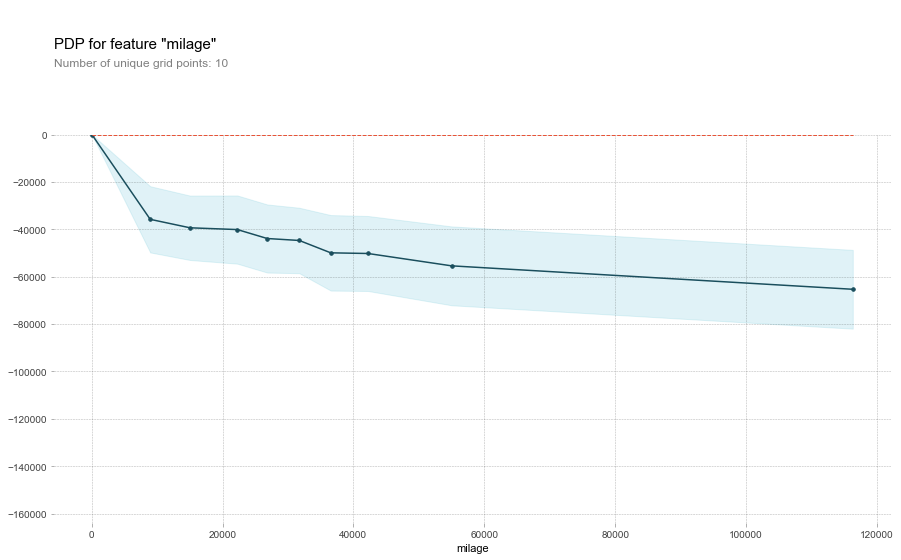

In [298]:
pdp_plot(isolated, feature_name=feature)

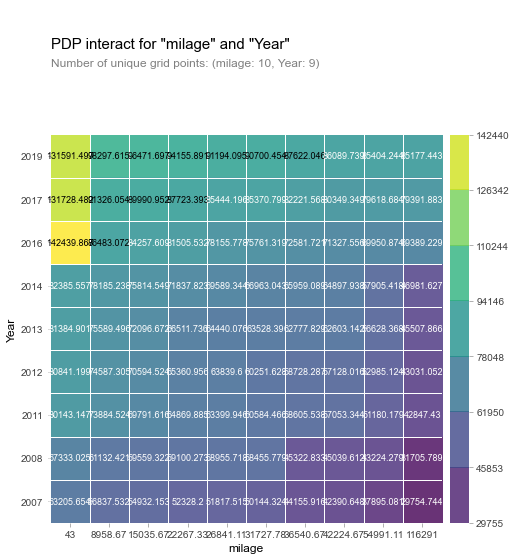

In [300]:
features = ['milage', 'Year']

interaction = pdp_interact(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);